In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Importamos las librerias 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os
        
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.shape

(1599, 12)

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Revisión de valores nulos
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Calcular indices de correlacion
correlation_matrix = data.corr()
correlation_with_quality = correlation_matrix['quality'].drop('quality')

# Seleccionar 2 variables con la mayor correlacion con la calidad
top_correlation = correlation_with_quality.abs().nlargest(2)
top_variables = top_correlation.index

top_correlation.index

Index(['alcohol', 'volatile acidity'], dtype='object')

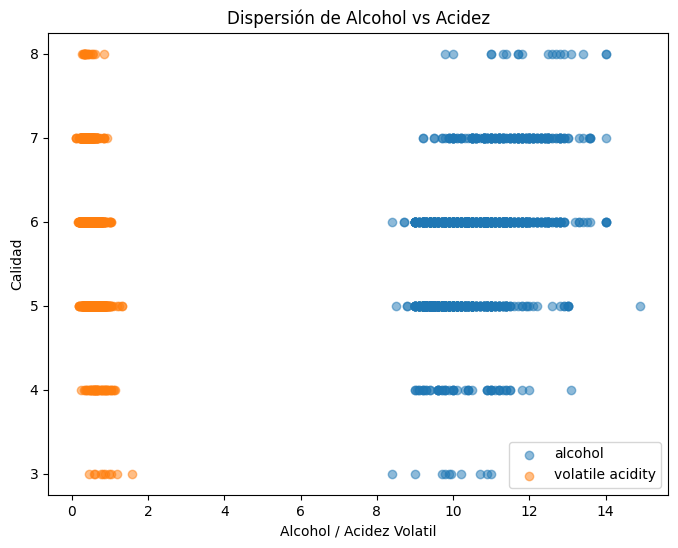

In [6]:
# Diagramar Dipersión de las 2 variables con mayor correlación
plt.figure(figsize=(8, 6))
plt.scatter(data['alcohol'], data['quality'], alpha=0.5, label=top_variables[0])
plt.scatter(data['volatile acidity'], data['quality'], alpha=0.5, label=top_variables[1])
plt.xlabel('Alcohol' + ' / ' + 'Acidez Volatil')
plt.ylabel('Calidad')
plt.title('Dispersión de {} vs {}'.format('Alcohol', 'Acidez'))
plt.legend()
plt.show()

### De manera preliminar podemos observar que una acidez volatil más baja ayuda a que la calidad del vino sea más alto, además de un nivel de alcohol de entre 9 y 14, por lo que vamos a seleccionar estas variables para hacer la predicción junto con otras que son utiles en el contexto del ejercicio, como el PH y la presencia de ácido citrico

In [7]:
# Clasificación de Datos de Calidad

def map_quality_score(score):
    if score <= 2:
        return 'Terrible'
    elif score <= 5:
        return 'Mala'
    elif score <= 8:
        return 'Buena'
    else:
        return 'Excelente'
    
data['quality_category'] = data['quality'].apply(map_quality_score)

In [8]:
predictors_col = ["alcohol", "volatile acidity", "pH", "citric acid"]
target_col = ["quality_category"]

In [9]:
predictors = data[predictors_col]
target = data[target_col]

predictors

,alcohol,volatile acidity,pH,citric acid
0,9.4,0.700,3.51,0.00
1,9.8,0.880,3.20,0.00
2,9.8,0.760,3.26,0.04
3,9.8,0.280,3.16,0.56
4,9.4,0.700,3.51,0.00
...,...,...,...,...
1594,10.5,0.600,3.45,0.08
1595,11.2,0.550,3.52,0.10
1596,11.0,0.510,3.42,0.13
1597,10.2,0.645,3.57,0.12


In [10]:
# Chequeo de Correlación

corr = predictors.corr()
corr

,alcohol,volatile acidity,pH,citric acid
alcohol,1.000000,-0.202288,0.205633,0.109903
volatile acidity,-0.202288,1.000000,0.234937,-0.552496
pH,0.205633,0.234937,1.000000,-0.541904
citric acid,0.109903,-0.552496,-0.541904,1.000000


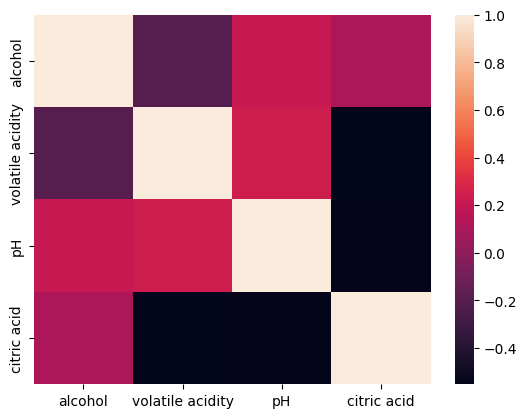

In [11]:
sns.heatmap(corr)
plt.show()

In [20]:
# División de datos con proporcion de 25% de datos de test
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

[Text(0.6203374549201442, 0.9722222222222222, 'x[0] <= 10.525\ngini = 0.497\nsamples = 1279\nvalue = [690, 589]'),
 Text(0.3145318134981968, 0.9166666666666666, 'x[1] <= 0.548\ngini = 0.468\nsamples = 774\nvalue = [289, 485]'),
 Text(0.1191202988150438, 0.8611111111111112, 'x[1] <= 0.317\ngini = 0.5\nsamples = 364\nvalue = [183, 181]'),
 Text(0.028851107676455434, 0.8055555555555556, 'x[0] <= 9.75\ngini = 0.302\nsamples = 54\nvalue = [44, 10]'),
 Text(0.014837712519319939, 0.75, 'x[0] <= 9.45\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(0.006594538897475528, 0.6944444444444444, 'x[3] <= 0.385\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.003297269448737764, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.009891808346213293, 0.6388888888888888, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.02308088614116435, 0.6944444444444444, 'x[3] <= 0.395\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.01648634724368882, 0.6388888888888888, '

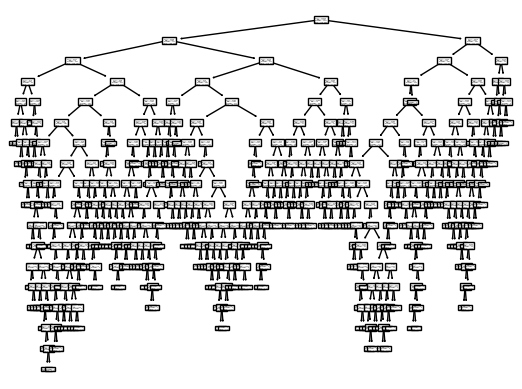

In [21]:
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)
plot_tree(arbol)

In [22]:
predicciones = arbol.predict(X_test)
predicciones

array(['Buena', 'Mala', 'Mala', 'Mala', 'Buena', 'Mala', 'Mala', 'Buena',
       'Mala', 'Mala', 'Mala', 'Buena', 'Mala', 'Mala', 'Buena', 'Buena',
       'Buena', 'Buena', 'Buena', 'Buena', 'Mala', 'Buena', 'Buena',
       'Mala', 'Mala', 'Buena', 'Mala', 'Mala', 'Buena', 'Mala', 'Mala',
       'Mala', 'Mala', 'Buena', 'Mala', 'Buena', 'Buena', 'Mala', 'Mala',
       'Buena', 'Mala', 'Mala', 'Buena', 'Buena', 'Mala', 'Buena',
       'Buena', 'Buena', 'Buena', 'Buena', 'Mala', 'Mala', 'Buena',
       'Mala', 'Buena', 'Mala', 'Mala', 'Buena', 'Buena', 'Mala', 'Mala',
       'Mala', 'Mala', 'Buena', 'Buena', 'Buena', 'Buena', 'Mala', 'Mala',
       'Mala', 'Buena', 'Mala', 'Buena', 'Buena', 'Mala', 'Mala', 'Mala',
       'Mala', 'Mala', 'Mala', 'Buena', 'Buena', 'Buena', 'Mala', 'Buena',
       'Buena', 'Buena', 'Buena', 'Buena', 'Mala', 'Mala', 'Buena',
       'Buena', 'Mala', 'Buena', 'Buena', 'Mala', 'Mala', 'Buena', 'Mala',
       'Buena', 'Buena', 'Mala', 'Mala', 'Buena', 'Buena', '

In [23]:
# Evaluar el modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, predicciones))

# Calcular Precisión
accuracy = accuracy_score(y_test, predicciones)
print("Precisión:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

       Buena       0.74      0.73      0.74       165
        Mala       0.72      0.73      0.72       155

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320

Precisión: 0.73125


### Podemos observar una precicisón en el modelo del 73% aproximadamente

In [24]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,Buena,Mala
Actual,,
Buena,121,44
Mala,42,113


### Analisis de los resultados

### 1. Se encontró que la mayor correlación entre la calidad del producto y sus caracteristicas se encontró en la cantidad de alcohol y en la acidez volatil, a menor acidez volatil se evidenció un aumento de la calidad.

### 2. La correlación entre el resto de variables no era muy fuerte en especial en el caso de la relación del alcohol con el resto de propiedades del vino.

### 3. Se realiza el modelo predictivo con arboles de decisión que dan resultados mixtos con una precisión del 73 ~ 74% aproximadamente, causado probablemente por la pobre relación entre ingredientes y la cantidad mixta de datos en el datset. Una poda de datos o del modelo del árbol puede mejorar la precisión total, por lo que hay espacio para mejorar.

### 